In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import normaltest
from scipy.stats import anderson
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
s1 = pd.read_csv('Survey-1.csv')


In [59]:
#s1.head(5)
#s1.columns
#s1.shape
#s1.info()
#s1.isnull().any()
s1.describe(include='all')
#s1['Salary'].std()

,ID,Gender,Age,Class,Major,Grad_Intention,GPA,Employment,Salary,Social_Networking,Satisfaction,Spending,Computer,Text_Messages
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,62.000000,62.000000,62,62.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,NaN,NaN,55,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,3.741935,482.016129,NaN,246.209677
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,1.213793,221.953805,NaN,214.465950
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.000000
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,3.000000,312.500000,NaN,100.000000
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,4.000000,600.000000,NaN,300.000000


In [252]:
#Gender and Major
pd.crosstab(s1.Gender,s1.Major,margins=True, margins_name="Total")

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [14]:
#Gender and Grad Intention
s1.columns = [c.replace(' ', '_') for c in s1.columns]
pd.crosstab(s1.Gender,s1.Grad_Intention,margins=True, margins_name="Total")

Grad_Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [195]:
#Gender and Employment
pd.crosstab(s1.Gender,s1.Employment, margins=True, margins_name="Total")

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [248]:
#Gender and Computer
pd.crosstab(s1.Gender,s1.Computer,margins=True)


Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [146]:
#What is the probability that a randomly selected CMSU student will be male? 
#What is the probability that a randomly selected CMSU student will be female?
#print(len(s1))
rp=s1.groupby('Gender').size().div(len(s1))
print(rp)
print("probability that a randomly selected CMSU student will be female is {0}".format(rp[0]))
print("probability that a randomly selected CMSU student will be male is {0}".format(rp[1]))

Gender
Female    0.532258
Male      0.467742
dtype: float64
probability that a randomly selected CMSU student will be female is 0.532258064516129
probability that a randomly selected CMSU student will be male is 0.46774193548387094


In [189]:
#Find the conditional probability of different majors among the male students in CMSU. 
#Find the conditional probability of different majors among the female students of CMSU.
#s1.groupby('Major').size()
#rbs = s1.groupby('Gender').size().div(len(s1))
#s1.groupby(['Major', 'Gender']).size().div(len(s1)).div(rbs, axis=0, level='Gender')


In [42]:
dfs1 = s1.groupby('Major')['Gender'].value_counts() / s1.groupby('Major')['Gender'].count()
dff = dfs1.reset_index(name='condprob')
dff
print("Cond.prob. of different majors among the Male students in CMSU is")
dff.loc[dff["Gender"] == "Male"]
#print(dff1['condprob'].sum())
#print("conditional probability of different majors among the male students in CMSU is\n {0}".format(outmale))

Cond.prob. of different majors among the Male students in CMSU is


,Major,Gender,condprob
0,Accounting,Male,0.571429
3,CIS,Male,0.250000
5,Economics/Finance,Male,0.363636
7,International Business,Male,0.333333
8,Management,Male,0.600000
10,Other,Male,0.571429
13,Retailing/Marketing,Male,0.357143
14,Undecided,Male,1.000000


In [188]:
#Find the conditional probability of intent to graduate, given that the student is a male.
#Find the conditional probability of intent to graduate, given that the student is a female.
#s1.columns

In [44]:
dfs2 = s1.groupby('Grad_Intention')['Gender'].value_counts() / s1.groupby('Grad_Intention')['Gender'].count()
#print(dfs2.corr())
dff1= dfs2.reset_index(name='condprob')
#dff1
print("Cond. prob. of intent to graduate, given that the student is Male is")
dff1.loc[dff1["Gender"] == "Male"]

Cond. prob. of intent to graduate, given that the student is Male is


,Grad_Intention,Gender,condprob
1,No,Male,0.250000
3,Undecided,Male,0.409091
4,Yes,Male,0.607143


In [187]:
#rbs1 = s1.groupby('Grad_Intention').size().div(len(s1))
#s1.groupby(['Grad_Intention', 'Gender']).size().div(len(s1)).div(rbs1, axis=0, level=0)

In [45]:
#Find the conditional probability of employment status for the male students as well as for the female students.
dfs3 = s1.groupby('Employment')['Gender'].value_counts() / s1.groupby('Employment')['Gender'].count()
dff2= dfs3.reset_index(name='condprob')
print("Cond. prob. of employment status for the male and female students is")
dff2

Cond. prob. of employment status for the male and female students is


,Employment,Gender,condprob
0,Full-Time,Male,0.700000
1,Full-Time,Female,0.300000
2,Part-Time,Female,0.558140
3,Part-Time,Male,0.441860
4,Unemployed,Female,0.666667
5,Unemployed,Male,0.333333


In [53]:
#Find the conditional probability of laptop preference among the male students as well as among the female students.
dfs4 = s1.groupby('Computer')['Gender'].value_counts() / s1.groupby('Computer')['Gender'].count()
dff3 = dfs4.reset_index(name='condprob')
print("Cond. prob. of Computer among the male students and female students is\n")
print(dff3)
print("\nCond. prob. of Laptop preference among the male students and female students is\n")
dff3.loc[dff3["Computer"] == "Laptop"]

Cond. prob. of Computer among the male students and female students is

  Computer  Gender  condprob
0  Desktop    Male  0.600000
1  Desktop  Female  0.400000
2   Laptop  Female  0.527273
3   Laptop    Male  0.472727
4   Tablet  Female  1.000000

Cond. prob. of Laptop preference among the male students and female students is



,Computer,Gender,condprob
2,Laptop,Female,0.527273
3,Laptop,Male,0.472727


In [61]:
#Based on the above probabilities, do you think that the column variable in each case
#is independent of Gender? Justify your comment in each case.
#Based on chisquare test of independence we can test whether each column variable is independent of Gender variable
#H0: There is no statistically significant relationship between Gender and Major
#H1: There is statistically significant relationship between Gender and Major
#p-value is 0.42 > 0.05, hence null hypothesis is accepted.
# Hence, There is no statistically significant relationship between Gender and Major
#which means Major variable is independent of Gender
crosstab = pd.crosstab(s1.Gender,s1.Computer)
print("Chisquare test of independence - Gender and Computer")
stats.chi2_contingency(crosstab)


Chisquare test of independence - Gender and Computer


(2.114372565783224,
 0.3474320117040881,
 2,
 array([[ 2.66129032, 29.27419355,  1.06451613],
        [ 2.33870968, 25.72580645,  0.93548387]]))

In [96]:
#X= s1.iloc[ : , :-1].values
#print(X)
#y= s1.iloc[ : , 4].values
#print(y)

In [ ]:
#Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
#s1.columns
#s1.describe()
#s1['Salary','Spending', 'Text_Messages']

#empirical rule: 
mean1=np.mean(s1['Salary'])
sd=np.std(s1['Salary'])
s1[s1['Salary'] > mean1 + 3 * sd]


In [38]:
#value = np.random.normal(loc=49,scale=12,size=62)#loc = mean, scale = std, size = 62
#sns.distplot(value)


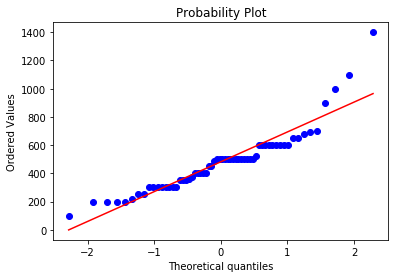

In [88]:
#sns.distplot(s1.Salary,fit=norm, kde=False)
#s1[['Salary','Spending']].plot(kind='box')
#s1.boxplot(column=['Salary','Spending','Text_Messages'])
#stats.wilcoxon(s1['Text_Messages'])
#stats.probplot(s1['Text_Messages'], plot= plt)
stats.probplot(s1['Spending'], dist="norm", plot=pylab)
pylab.show()
#stats.shapiro(s1['Salary'])
#Normal quantileQuantile(QQ) plots that exhibit this behavior usually 
#mean that data have more extreme values than would be expected if they truly came from a Normal distribution.
# we can see Symmetric distribution of column variables, which represents a fair balance between left and right tails.
# But based on the distplot alone, we cannot conclude about normality of variable, We can also use Normal test to get further insights
#stats.normaltest(s1["Salary"])
#Normal test
#H0: Column variable Salary follows normal distribution
#H1: Column variable Salary does not follows normal distribution
#p value is 0.14 > 0.05 which means null hypothesis is accepted, hence, Column variable Salary follows normal distribution

In [73]:
#sns.distplot(s1.Spending, fit=norm, kde=False)
#s1['ID'].plot(kind='box')
#stats.normaltest(s1["Spending"])
#empirical rule
# calculate summary statistics
sal_mean, sal_std = np.mean(s1['Spending']), np.std(s1['Spending'])

# identify outliers
cut_off = sal_std * 3
lower, upper = sal_mean - cut_off, sal_mean + cut_off

# identify outliers
outliers = [x for x in s1['Spending'] if x < lower or x > upper]
print('Identified outliers in Spending: %d' % len(outliers))



Identified outliers in Spending: 1


In [90]:
#s1.columns
#sns.distplot(s1.Text_Messages, fit=norm, kde=False)
#s1['Text_Messages'].plot(kind='box')
#stats.normaltest(s1["Text_Messages"])
#print(stats.shapiro(s1['Text_Messages']))
#result = anderson(s1['Text_Messages'])
#print(result.statistic)
#print(result.critical_values)
#It is not normally distributed based on normal test

In [91]:
#s1['Gender'].value_counts()

In [ ]:
#bssed on skewness
#skewness = 0 : normally distributed.
#skewness > 0 : more weight in the left tail of the distribution.
#skewness < 0 : more weight in the right tail of the distribution.
#print("Skewness of Text_Messages is")
#s2 = s1['ID'].skew()
#print(s2)
#if(s2>0):
#print("which is > 0, more weight in the left tail of the distribution and hence not normally distributed")
#Normal test
#H0: data Spending follows normal distribution
#H1: data Spending does not follows normal distribution
#p value is 2.38 > 0.05 which means null hypothesis is accepted, hence,data Spending follows normal distribution